In [1]:
import pandas as pd
test_df = pd.read_csv("mypy_70_Test_inference.csv")
test_df

,Unnamed: 0,text,label,pred
0,264,behaviour of not annotated init on inheritance...,0,0
1,536,union of a class with any base and none is som...,1,1
2,259,error cannot redefine t as a type variable wit...,0,1
3,137,support function decorators excellently decora...,0,0
4,227,prohibit issubclass for runtime protocols with...,0,0
...,...,...,...,...
509,71,better type for self in untyped functions runn...,0,0
510,106,internal error when using assignment expressio...,1,1
511,270,noimplicitreexport should treat names in all a...,1,0
512,435,enum final checking false positive in complex ...,1,1


In [2]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(test_df["label"].values, test_df["pred"].values)

print(cf_matrix)

[[169  88]
 [ 85 172]]


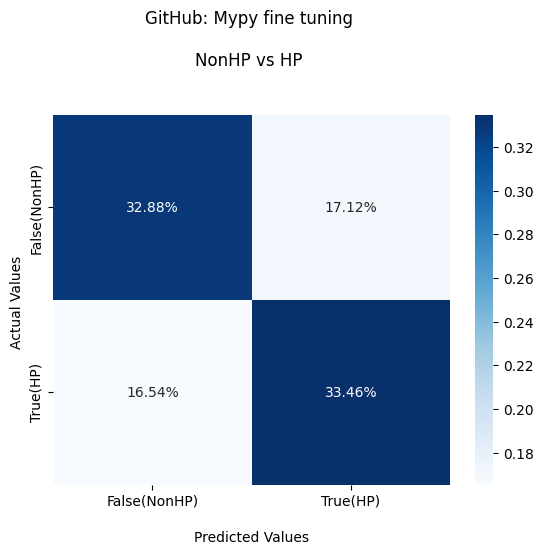

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('GitHub: Mypy fine tuning \n\nNonHP vs HP \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False(NonHP)','True(HP)'])
ax.yaxis.set_ticklabels(['False(NonHP)','True(HP)'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [4]:
from sklearn.metrics import classification_report


print(classification_report(test_df["label"].values, test_df["pred"].values))

              precision    recall  f1-score   support

           0       0.67      0.66      0.66       257
           1       0.66      0.67      0.67       257

    accuracy                           0.66       514
   macro avg       0.66      0.66      0.66       514
weighted avg       0.66      0.66      0.66       514



In [5]:
from sklearn.metrics import matthews_corrcoef

# Calculate the Matthew's Correlation Coefficient
mcc = matthews_corrcoef(test_df["label"].values, test_df["pred"].values)
print("Matthew's Correlation Coefficient:", mcc)

Matthew's Correlation Coefficient: 0.3268705198784323
